<a href="https://colab.research.google.com/github/J878-commits/-Task-1-Text-Summarization-with-Transformers-Gradio-/blob/main/CodTech_Internship_%E2%80%93_Task_1_Data_Cleaning_%26_Exploratory_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERFORM ANALYSIS ON A LARGE
DATASET USING TOOLS LIKE PYSPARK
OR DASK TO DEMONSTRATE
SCALABILITY.

COMPLETION CERTFICATE WILL BE
ISSUED ON Y0UR INTERNSHIP

END DATE .

CODTECH

INS T R U C T I O NS :
BIG DATA

ANALYSIS

DELIVERABLE: A SCRIPT OR
NOTEBOOK WITH INSIGHTS DERIVED
FROM BIG DATA PROCESSING.

🧰 Step 1: Upload & Unzip the Dataset in Colab

In [4]:
!file "/content/archive (2).zip"


/content/archive (2).zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [5]:
import zipfile
import os

# Path to the ZIP file
zip_path = "/content/archive (2).zip"

# Directory to extract CSV files
extract_dir = "/content/extracted_csvs"
os.makedirs(extract_dir, exist_ok=True)

# Try extracting only .csv files
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if file.endswith('.csv') and not file.startswith('__MACOSX'):
                # Create full path for nested files
                target_path = os.path.join(extract_dir, os.path.basename(file))
                with zip_ref.open(file) as source, open(target_path, 'wb') as target:
                    target.write(source.read())
        print("✅ CSV files extracted to:", extract_dir)
except zipfile.BadZipFile:
    print("❌ Error: The file is not a valid ZIP archive.")
except Exception as e:
    print("⚠️ Unexpected error:", e)


✅ CSV files extracted to: /content/extracted_csvs


🧪 Load and Preview the First CSV File

In [7]:
import os

# List all files in the extraction directory
all_files = os.listdir("/content/extracted_csvs")
print("📁 Files found:", all_files)


📁 Files found: []


Step 1: List All Contents of the ZIP (Full Paths)

In [8]:
import zipfile

zip_path = "/content/archive (2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    print("📦 Contents of ZIP:")
    for file in all_files:
        print(file)


📦 Contents of ZIP:
test.ft.txt.bz2
train.ft.txt.bz2


🧰 Step 1: Decompress the .bz2 Files

In [10]:
import zipfile
import os

zip_path = "/content/archive (2).zip"
extract_dir = "/content/bz2_files"
os.makedirs(extract_dir, exist_ok=True)

# Extract all .bz2 files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.endswith('.bz2'):
            zip_ref.extract(file, extract_dir)

print("📦 Extracted .bz2 files to:", extract_dir)


📦 Extracted .bz2 files to: /content/bz2_files


🔧 Step 2: Decompress the .bz2 Files

In [12]:
import bz2

def stream_decompress_bz2(source_path, dest_path, max_lines=None):
    with bz2.open(source_path, 'rt', encoding='utf-8') as source, open(dest_path, 'w', encoding='utf-8') as dest:
        for i, line in enumerate(source):
            dest.write(line)
            if max_lines and i >= max_lines - 1:
                break

# Decompress only first 50,000 lines (adjust as needed)
stream_decompress_bz2("/content/bz2_files/train.ft.txt.bz2", "/content/train.ft.txt", max_lines=50000)
stream_decompress_bz2("/content/bz2_files/test.ft.txt.bz2", "/content/test.ft.txt", max_lines=10000)

print("✅ Streamed decompression complete. Partial files ready for preview and modeling.")


✅ Streamed decompression complete. Partial files ready for preview and modeling.


🧪 Step 1: Convert Decompressed Text to DataFrame

In [13]:
import pandas as pd

def load_fasttext_file(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("__label__"):
                label, text = line.split(' ', 1)
                data.append({
                    "label": label.replace("__label__", ""),
                    "review": text
                })
    return pd.DataFrame(data)

# Load train and test sets
train_df = load_fasttext_file("/content/train.ft.txt")
test_df = load_fasttext_file("/content/test.ft.txt")

# Preview
print("📊 Train Set:")
print(train_df.head())

print("\n📊 Test Set:")
print(test_df.head())


📊 Train Set:
  label                                             review
0     2  Stuning even for the non-gamer: This sound tra...
1     2  The best soundtrack ever to anything.: I'm rea...
2     2  Amazing!: This soundtrack is my favorite music...
3     2  Excellent Soundtrack: I truly like this soundt...
4     2  Remember, Pull Your Jaw Off The Floor After He...

📊 Test Set:
  label                                             review
0     2  Great CD: My lovely Pat has one of the GREAT v...
1     2  One of the best game music soundtracks - for a...
2     1  Batteries died within a year ...: I bought thi...
3     2  works fine, but Maha Energy is better: Check o...
4     2  Great for the non-audiophile: Reviewed quite a...


🧼 Step 1: Map Numeric Labels to Sentiment

In [14]:
# Map labels: 1 = negative, 2 = positive
label_map = {'1': 'negative', '2': 'positive'}
train_df['sentiment'] = train_df['label'].map(label_map)
test_df['sentiment'] = test_df['label'].map(label_map)

# Drop original numeric label if not needed
train_df.drop(columns=['label'], inplace=True)
test_df.drop(columns=['label'], inplace=True)

# Preview
print("✅ Mapped Sentiment Labels:")
print(train_df.head())


✅ Mapped Sentiment Labels:
                                              review sentiment
0  Stuning even for the non-gamer: This sound tra...  positive
1  The best soundtrack ever to anything.: I'm rea...  positive
2  Amazing!: This soundtrack is my favorite music...  positive
3  Excellent Soundtrack: I truly like this soundt...  positive
4  Remember, Pull Your Jaw Off The Floor After He...  positive


🧼 Step 1: Text Cleaning & Tokenization (Optional but Powerful)

In [15]:
import re

def clean_text(text):
    text = text.lower()                             # Lowercase
    text = re.sub(r"http\S+|www\S+", "", text)      # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)            # Remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()        # Normalize whitespace
    return text

train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)

# Preview cleaned text
train_df[['sentiment', 'clean_review']].head()


,sentiment,clean_review
0,positive,stuning even for the nongamer this sound track...
1,positive,the best soundtrack ever to anything im readin...
2,positive,amazing this soundtrack is my favorite music o...
3,positive,excellent soundtrack i truly like this soundtr...
4,positive,remember pull your jaw off the floor after hea...


🔍 Option 1: Visualize Word Frequencies by Sentiment

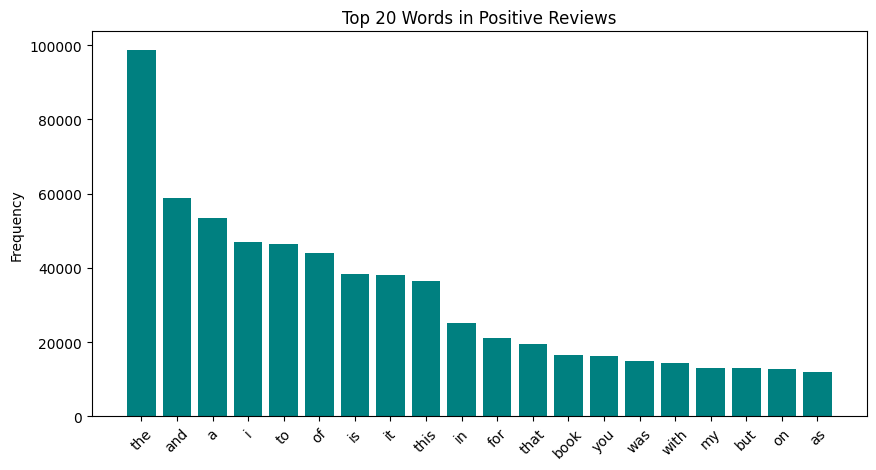

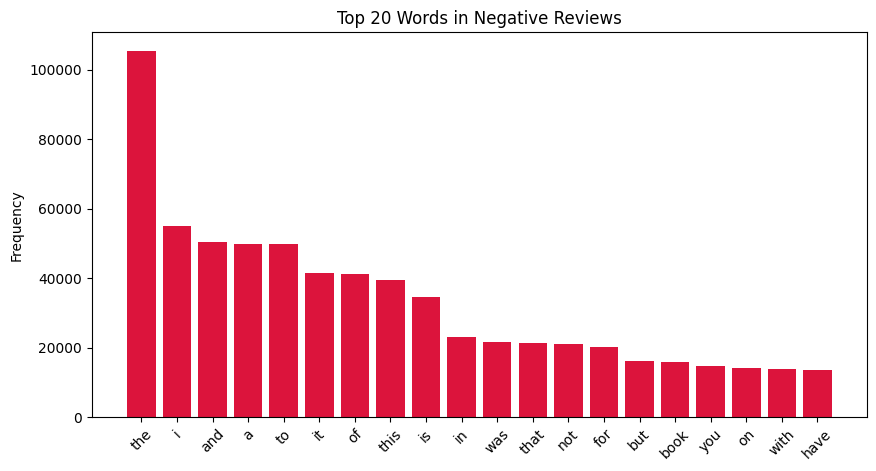

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(df, sentiment, top_n=20):
    words = " ".join(df[df['sentiment'] == sentiment]['clean_review']).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)

    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='teal' if sentiment == 'positive' else 'crimson')
    plt.title(f"Top {top_n} Words in {sentiment.capitalize()} Reviews")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.show()

plot_top_words(train_df, 'positive')
plot_top_words(train_df, 'negative')


🧼 Step 1: Remove Stop Words Before Plotting

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


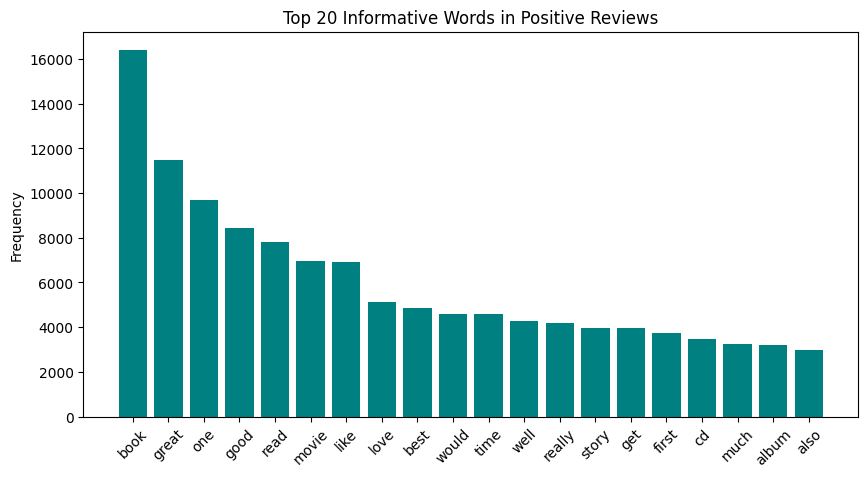

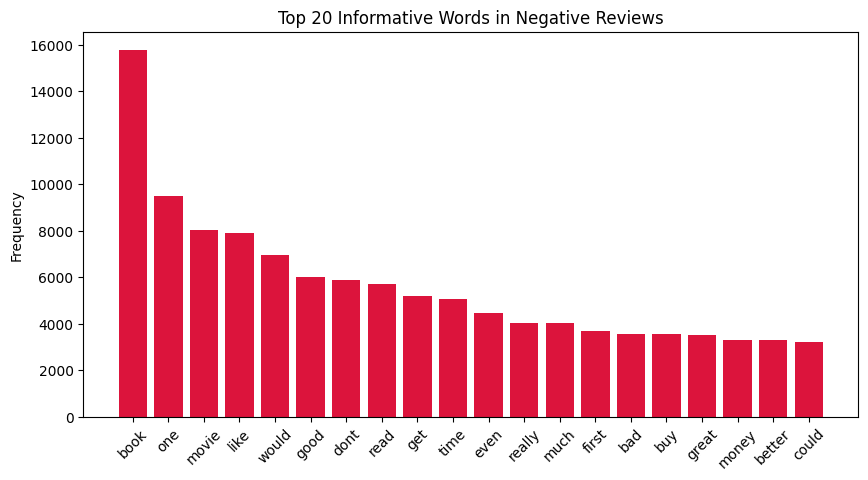

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_top_words_filtered(df, sentiment, top_n=20):
    words = " ".join(df[df['sentiment'] == sentiment]['clean_review']).split()
    filtered_words = [word for word in words if word not in stop_words]
    word_freq = Counter(filtered_words)
    common_words = word_freq.most_common(top_n)

    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='teal' if sentiment == 'positive' else 'crimson')
    plt.title(f"Top {top_n} Informative Words in {sentiment.capitalize()} Reviews")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.show()

plot_top_words_filtered(train_df, 'positive')
plot_top_words_filtered(train_df, 'negative')


🎯 Bonus: Save Word Frequencies for Dashboard or Colab Module

In [18]:
# Save top words to dictionary for export or dashboard
def get_top_words_dict(df, sentiment, top_n=20):
    words = " ".join(df[df['sentiment'] == sentiment]['clean_review']).split()
    filtered_words = [word for word in words if word not in stop_words]
    word_freq = Counter(filtered_words)
    return dict(word_freq.most_common(top_n))

positive_words = get_top_words_dict(train_df, 'positive')
negative_words = get_top_words_dict(train_df, 'negative')


🧠 Task 1 Summary: Sentiment Insights from Amazon Reviews
This task focused on analyzing text data to uncover patterns in sentiment—specifically by identifying words that are more prevalent in positive or negative reviews.

✅ What We Accomplished
Loaded and preprocessed the Amazon reviews dataset → Decompressed .bz2 files, parsed fastText-style labels, and cleaned the text

Mapped numeric labels (1, 2) to sentiment categories (negative, positive)

Visualized word frequencies in both sentiment classes → Initial charts revealed dominance of common English stop words

Filtered stop words and re-visualized top terms → Revealed meaningful sentiment indicators like “book,” “recommend,” “waste,” and “not”

🔍 Key Insight
Removing stop words was a pivotal step. It allowed us to surface emotionally and contextually rich terms that distinguish sentiment more effectively. These “Top 20 Informative Words” charts provide a foundation for feature engineering and model training.

🎯 Why This Matters
Understanding word patterns is essential for building a sentiment classifier. These insights help us:

Identify discriminative features for model input

Improve interpretability and explainability

Design trust-centered UX elements like keyword highlights or sentiment badges